In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [2]:
# Load reduced dataset (from feature selection)
df = pd.read_csv("data/heart_selected.csv")

X = df.drop("target", axis=1)
y = df["target"]

print("Shape:", X.shape)


Shape: (297, 10)


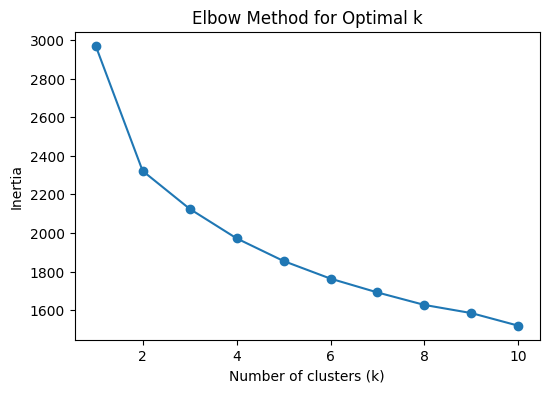

In [3]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


ARI Score (vs target): 0.34493194830616214
Silhouette Score: 0.22007454492349657


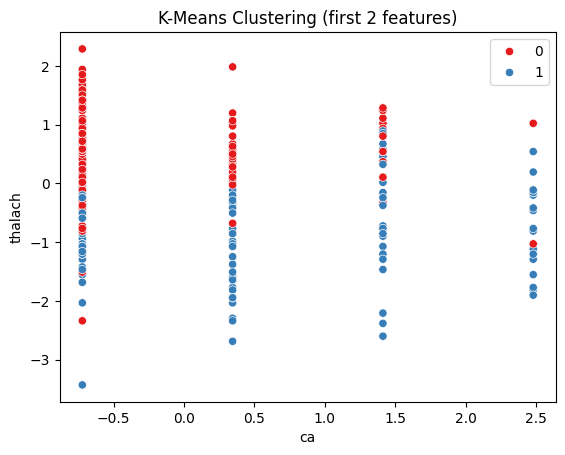

In [4]:
k_optimal = 2  # usually elbow at 2 for binary classification
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

df["KMeans_Cluster"] = clusters_kmeans

print("ARI Score (vs target):", adjusted_rand_score(y, clusters_kmeans))
print("Silhouette Score:", silhouette_score(X, clusters_kmeans))

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=clusters_kmeans, palette="Set1")
plt.title("K-Means Clustering (first 2 features)")
plt.show()


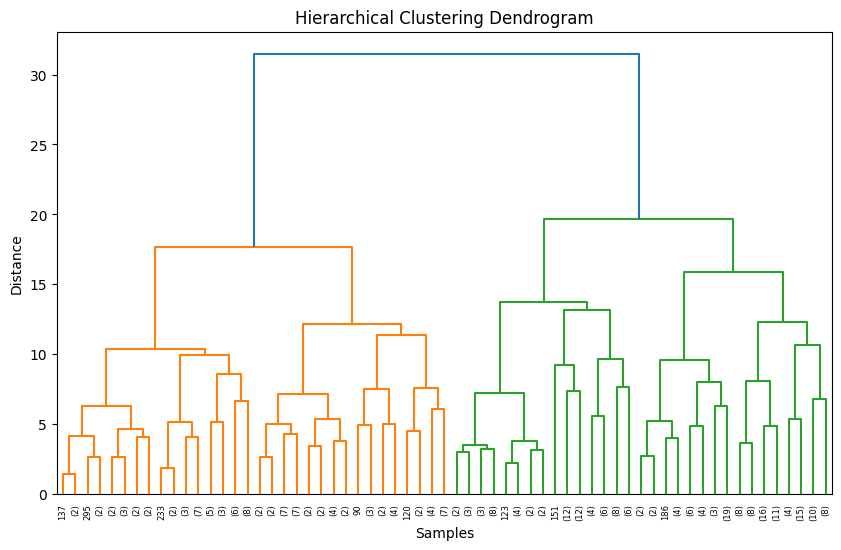

In [5]:
plt.figure(figsize=(10,6))
Z = linkage(X, method="ward")
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


ARI Score (vs target): 0.2037315666489367
Silhouette Score: 0.18468025449796324


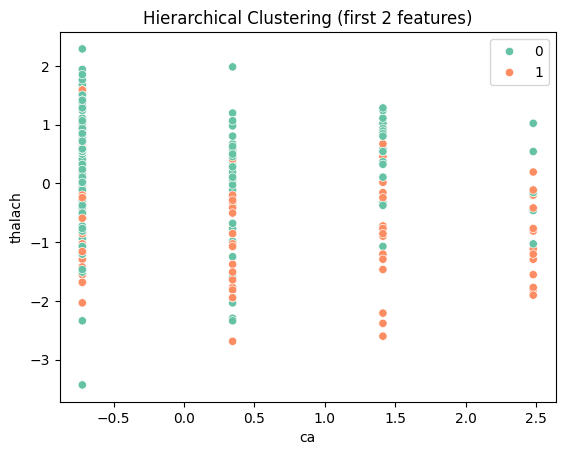

In [6]:
hier = AgglomerativeClustering(n_clusters=2, linkage="ward")
clusters_hier = hier.fit_predict(X)

df["Hier_Cluster"] = clusters_hier

print("ARI Score (vs target):", adjusted_rand_score(y, clusters_hier))
print("Silhouette Score:", silhouette_score(X, clusters_hier))

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=clusters_hier, palette="Set2")
plt.title("Hierarchical Clustering (first 2 features)")
plt.show()


In [7]:
df.to_csv("data/heart_clusters.csv", index=False)
print("Saved dataset with clusters as data/heart_clusters.csv")


Saved dataset with clusters as data/heart_clusters.csv
